
## USD vs EUR

In [59]:
%matplotlib inline

from datetime import datetime, timedelta
from pandas import Index
from pandas.io.data import DataReader
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
import requests

FIN_SERVICE_PROVIDER = 'yahoo'
PAST_DAYS = 60

# SYMBOL = ['IBM', 'AAPL']
SYMBOL = ['USD', 'EUR']

# today
t1 = datetime.now()
# two months later
t2 = t1 - timedelta(days=PAST_DAYS)

df1  = DataReader(SYMBOL[0],  FIN_SERVICE_PROVIDER , t2, t1)
df2  = DataReader(SYMBOL[1],  FIN_SERVICE_PROVIDER , t2, t1)


from datetime import datetime

print('Today {}'.format(datetime.now()))

Today 2015-05-20 15:37:24.321514


### USD

In [60]:
df1.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-23,96.17,96.33,93.99,93.99,9000,93.85796
2015-03-24,95.23,95.23,93.12,93.25,1900,93.11900
2015-03-25,93.26,93.26,83.90,83.90,15300,83.90000
2015-03-26,81.70,85.30,79.39,84.51,11400,84.51000
2015-03-27,84.63,91.59,83.88,91.37,13000,91.37000


### EUR

In [61]:
df2.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-23,33.00,33.16,32.71,32.87,494500,32.18
2015-03-24,32.98,32.98,32.61,32.69,439000,32.00
2015-03-25,32.73,32.87,32.00,32.29,283400,31.61
2015-03-26,32.27,32.27,31.47,31.50,403000,30.83
2015-03-27,31.51,32.65,31.51,32.65,361500,31.96


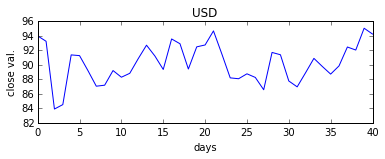

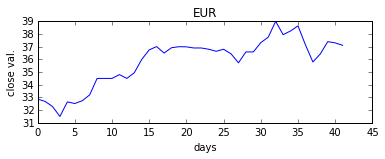

In [62]:
plt.figure(1)
plt.subplot(211)
plt.title(SYMBOL[0])
plt.xlabel('days')
plt.ylabel('close val.')
plt.plot(df1['Close'])

plt.figure(2)
plt.subplot(211)
plt.title(SYMBOL[1])
plt.xlabel('days')
plt.ylabel('close val.')
plt.plot(df2['Close'])

## Bitcoin History vs EUR

In [63]:
BIT_COIN_CSV_URL = 'http://www.quandl.com/api/v1/datasets/BCHARTS/KRAKENEUR.csv'

bcdf = read_csv(BIT_COIN_CSV_URL)
bcdf = bcdf[bcdf['Date']> t2.strftime("%Y-%m-%d")]
#bcdf = bcdf.iloc[::-1]
bcdf = bcdf.sort(['Date'], ascending=[True])
# reindexing
bcdf.index = Index(range(0, len(bcdf)))

In [64]:
bcdf.tail()

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
47,2015-05-08,210.29998,218.00000,209.60000,214.01000,3105.615037,662858.469173,213.438711
48,2015-05-09,214.01000,217.36000,210.99999,213.55736,909.960985,194578.915411,213.832152
49,2015-05-10,213.55738,216.69370,211.37032,212.91127,987.074102,210837.080878,213.598027
50,2015-05-11,213.09996,217.39374,212.00000,215.00000,2612.180869,560448.878709,214.552095
51,2015-05-12,214.99999,215.72998,213.12104,213.85003,1839.101450,394344.393433,214.422317


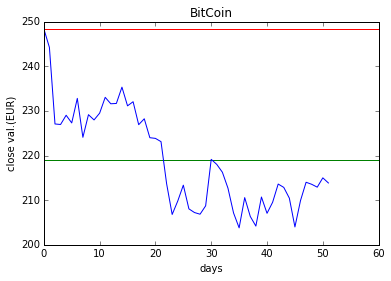

In [65]:
plt.title("BitCoin")
plt.xlabel('days')
plt.ylabel('close val.(EUR)')
# mean line.
plt.axhline(bcdf['Close'].mean(), color='green', linewidth=1)
plt.axhline(bcdf['Close'].max(), color='red', linewidth=1)
plt.plot(bcdf['Close'])

### Close Price Statistics

#### Mean (in 60 Days)

In [66]:
bcdf['Close'].mean()

218.98867788461541

#### Variance (in 60 days)

In [67]:
bcdf['Close'].var()

121.14644641546057

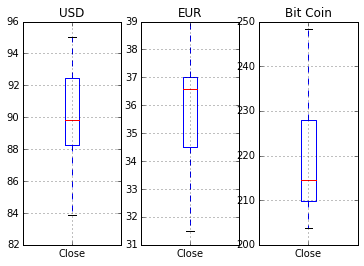

In [68]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.set_title(SYMBOL[0])
# ax1.title(SYMBOL[0])
ax1 = df1.boxplot(column='Close', return_type='axes')

ax2 = fig.add_subplot(1,3,2)
# ax2.plt.title(SYMBOL[1])
ax2.set_title(SYMBOL[1])
ax2 = df2.boxplot(column='Close', return_type='axes')

ax3 = fig.add_subplot(1,3,3)
# ax3.plt.title(SYMBOL[1])
ax3.set_title('Bit Coin')
ax3 = bcdf.boxplot(column='Close', return_type='axes')



### Gains

In [69]:
REAL_TIME_VALE_API = 'http://api.coindesk.com/v1/bpi/currentprice.json'
# REAL_TIME_VALE_API = "http://btc.blockr.io/api/v1/coin/info"
r = requests.get(REAL_TIME_VALE_API)
cur_value = 1
if r.status_code == 200:
    _j = r.json()['bpi']['EUR']
    cur_value = float(_j['rate'])
    print("Real time value {} {}".format(_j['rate'], _j['symbol']))

Real time value 210.4838 &euro;


Price per coin: **€208.87** 
This is the value in Euro I invested in **bitcoin**.

In [70]:
price_x_coin = 208.87
gain= float(cur_value) - float(price_x_coin)
print("Gain {}".format(gain))

print("{}%".format(gain*100/price_x_coin))

Gain 1.6138
0.7726336956%


### Predict


### Errors evaluation

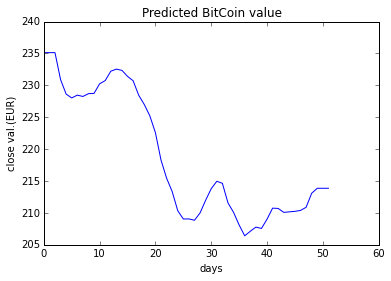

In [71]:
X = [ [x] for x in bcdf.index]
y = bcdf['Close']

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, list(y.values))

Y = [list(neigh.predict([[i]]))[0] for i in range(len(X))]

plt.title("Predicted BitCoin value")
plt.xlabel('days')
plt.ylabel('close val.(EUR)')
plt.plot(Y)

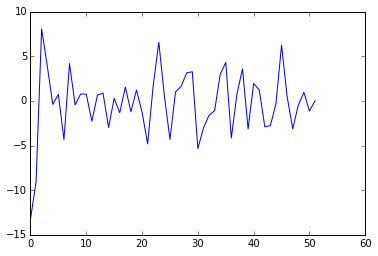

In [72]:
errors = [ Yi-yi for Yi, yi in zip(Y, y)]

plt.plot(errors)

In [73]:
import numpy as np

print("Error mean: {} ".format(np.mean(errors)))

Error mean: -0.219793269231 


### Tomorrow's prediction

In [74]:
print("Tomorrow's predicted closing value {}".format(neigh.predict([[60]])))

Tomorrow's predicted closing value [ 213.865732]


### Trend

In [75]:
def trend(row):
    if row.Open > row.Close:
        return '-'
    elif row.Open < row.Close:
        return '+'
    return '='

bcdf['Trend'] = bcdf.apply(trend, axis=1)

bcdf.tail()

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,Trend
47,2015-05-08,210.29998,218.00000,209.60000,214.01000,3105.615037,662858.469173,213.438711,+
48,2015-05-09,214.01000,217.36000,210.99999,213.55736,909.960985,194578.915411,213.832152,-
49,2015-05-10,213.55738,216.69370,211.37032,212.91127,987.074102,210837.080878,213.598027,-
50,2015-05-11,213.09996,217.39374,212.00000,215.00000,2612.180869,560448.878709,214.552095,+
51,2015-05-12,214.99999,215.72998,213.12104,213.85003,1839.101450,394344.393433,214.422317,-


### Simple Moving Avarage (SMV)

In [76]:
from __future__ import division

bcdf['Sma'] = 0

PERIOD_NUM = -20

bcdf_small = bcdf[PERIOD_NUM:]

bcdf_small.Sma = [sum(bcdf_small['Close'][0:i+1]) /(i+1) for i,_ in enumerate(bcdf_small.Close)]

In [77]:
bcdf_small.tail(10)

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,Trend,Sma
42,2015-05-03,209.52000,216.77454,208.68021,213.61000,1807.969953,386956.173818,214.027989,+,209.261298
43,2015-05-04,213.41490,216.99990,210.21000,212.86000,2230.388643,477373.739072,214.031640,-,209.561190
44,2015-05-05,213.14000,213.95000,208.00000,210.45000,3590.027827,755010.063988,210.307580,-,209.629560
45,2015-05-06,210.00000,210.89998,202.00000,204.00000,3235.799527,670318.459426,207.156980,-,209.227449
46,2015-05-07,203.00000,213.90475,201.61000,209.91000,3962.609508,821895.950489,207.412804,+,209.272952
47,2015-05-08,210.29998,218.00000,209.60000,214.01000,3105.615037,662858.469173,213.438711,+,209.569017
48,2015-05-09,214.01000,217.36000,210.99999,213.55736,909.960985,194578.915411,213.832152,-,209.803626
49,2015-05-10,213.55738,216.69370,211.37032,212.91127,987.074102,210837.080878,213.598027,-,209.976273
50,2015-05-11,213.09996,217.39374,212.00000,215.00000,2612.180869,560448.878709,214.552095,+,210.240679
51,2015-05-12,214.99999,215.72998,213.12104,213.85003,1839.101450,394344.393433,214.422317,-,210.421147


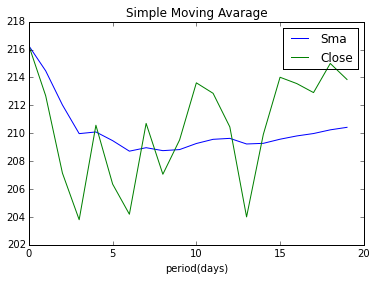

In [78]:
plt.title("Simple Moving Avarage")
plt.xlabel('period(days)')
plt.plot(bcdf_small['Sma'], label='Sma')
plt.plot(bcdf_small['Close'], label='Close')
plt.legend()